# Michaelis Menten

The Michaelis-Menten (MM) kinetic describes the rate of a chemical reaction catalized by enzymes, varying its concentration and the concentration of the substrate.

In biochemistry, Michaelis–Menten kinetics is one of the best-known models of enzyme kinetics.

It is named after German biochemist Leonor Michaelis and Canadian physician Maud Menten.

>**Def:** Catalysis is the process of increasing the rate of a chemical reaction by adding a substance known as a catalyst.
Catalysts are not consumed in the catalyzed reaction but can act repeatedly.

>**Def:** Enzymes are proteins that act as biological catalysts (biocatalysts). 
Catalysts accelerate chemical reactions. 
The molecules upon which enzymes may act are called substrates, and the enzyme converts the substrates into different molecules known as products. 

The MM kinetic is model as

$$
E + S \underset{k_b}{\stackrel{k_f}{\rightleftharpoons}} ES \xrightarrow[]{k_c} E + P
$$

where $k_c$ is the **catalytic constant** which regulates the rate of the enzymatic reaction.

The link between enzyme and substrate allows to reach the activation energy of the (*irreversible*) reaction.

The enzyme is highly specific for its substrate and their link is called **lock and key** mechanism.
This mechanism allows the union between enzymes and substrates non properly associated, leading to a consequent loss in the reaction efficiency.
In this way we can associate to each enzyme an affinity distribution with its substrates.

Using the **action mass law** we can re-write the MM kinetic model with the following set of differential equations

$$
\begin{cases}
    \frac{d[E]}{dt}  = -k_f[E][S] + k_b[ES] + k_c[ES] \\
    \frac{d[S]}{dt}  = -k_f[E][S] + k_b[ES]           \\
    \frac{d[ES]}{dt} =  k_f[E][S] - k_b[ES] - k_c[ES] \\
    \frac{d[P]}{dt}  =  k_c[ES]                       
\end{cases}
$$

>⚠️**Note:** The 2nd equation is exactly the opposite of the 1st one.
> This imposes the conservation of enzyme concentration!

>⚠️**Note:** The 4th equation is a typical 1st order irreversible reaction.

The solution of this system of equations can be obtained using the *Stationary State approximation*, i.e

* The 1st equation is redundant, since the kinetic imposes the conservation of the enzyme concentration

$$
[E]_{tot} = [E] + [ES] \rightarrow [E] = [E]_{tot} - [ES]
$$

* The approximation of (pseudo) Stationary State assumes as constant the concetration of $[ES]$, i.e more is created and more is consumed

$$
\frac{d[ES]}{dt} = 0 \rightarrow [ES] = \frac{k_f}{k_b + k_c}[E][S]
$$

* Therefore, we can define a reaction constant given by the combination of $k_f$, $k_b$, and $k_c$, i.e

$$
k_m = \frac{k_b + b_c}{kf}
$$

called **Michaelis-Menten constant**.

By substitution in the previous formula, we obtain

$$
[ES] = \frac{1}{k_m}[S]([E]_{tot} - [ES]) = \frac{[E]_{tot} [S]}{k_m + [S]}
$$

>⚠️**Note:** The approximation of stationary state is considered *pseudo* since in the final result remains the dependency by $[S]$.
> This approximation can be rethought as a very slow reaction process.

Now we can define the velocity of the product reaction as

$$
v_p = \frac{d[P]}{dt} = - \frac{d[S]}{dt} = \frac{k_c [E]_{tot} [S]}{k_m + [S]}
$$

since in an *ideal* kinetic the substrate is consumed as much as the product is created.

It is interesting to notice that *if* $[S] = k_m$ we are at the half of the maximum velocity of the reaction: in this way we can think about $k_m$ as the *affinity degree* between substrate and enzyme.

If $[S]\rightarrow\infty$ we achieve the asymptotic value of the reaction velocity: it corresponds to the condition in which there are more substrate than necessary and therefore the reaction is as fast as possible.

$$
v_p = \frac{v_{MAX} [S]}{k_m + [S]}
$$

where $v_{MAX}$ is the maximum velocity of the product generation.

Now lets try to implement the MM model as Python code.
As before we can easily obtain a simulation of our model using the *odeint* function of *scipy*.

In [3]:
import numpy as np

def conversion (y : tuple, t : np.ndarray, 
                kf : float, kb : float, kc : float) -> tuple:
    '''
    Michaelis-Menten conversion
    
    Parameters
    ----------
        y : tuple
            List of [S], [E], [ES], and [P] arrays
            
        t : array-like
            List of time points
        
        kf : float
            Forward constant
        
        kb : float
            Backward constant
        
        kc : float
            Product constant
    
    Returns
    -------
        delta : tuple
            Next point of [S], [E], [ES], and [P] arrays
    '''
    
    S, E, ES, P = y
    d_S  = -kf * S * E + kb * ES
    d_E  = -kf * S * E + kb * ES + kc * ES
    d_ES =  kf * S * E - kb * ES - kc * ES
    d_P  = kc * ES
    return (d_S, d_E, d_ES, d_P)

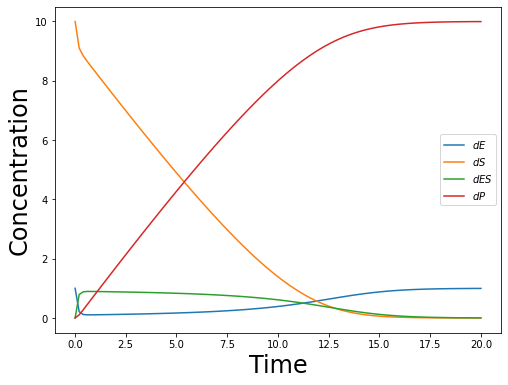

In [5]:
import pylab as plt
from scipy.integrate import odeint

# initial conditions
y0 = (10, 1, 0, 0) # (S0, E0, ES0, P0)
kf, kb, kc = (1., 1e-2, 1.)

time = np.linspace(1e-2, 20, 101)
res = odeint(conversion, y0, time, args=(kf, kb, kc))
dS, dE, dES, dP = zip(*res)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(time, dE, label='$dE$')
ax.plot(time, dS, label='$dS$')
ax.plot(time, dES, label='$dES$')
ax.plot(time, dP, label='$dP$')
ax.set_xlabel('Time', fontsize=24)
ax.set_ylabel('Concentration', fontsize=24)
ax.legend()

#### Extra - C++ version

We propose the C++ version of the same model.

In the version proposed above we have used the *odeint* function provided by *scipy*, while in C++ we need to implement the integration by hand.
In all the previous examples we have used the Euler method for the integration of ODEs; in this case we introduce a more advanced technique of ODE integration: the **Runge-Kutta** (RK) method.

The Runge-Kutta method is a mathematical algorithm used to solve systems of ordinary differential equations (ODEs). 
The general form of these equations is as follows:

$$
\dot{x} = f(t, x) \quad \quad x(t_0) = x_0
$$

Where $x$ is either a scalar or vector. 
The 4th order Runge-Kutta method (yes, there is different level of precision of the same method and the RK4 is the most common one in numerical simulation due to its good balance between numerical efficiency and numerical stability) is given by:

$$
x_{i+1} = x_i + (k_1 + 2(k_2 + k_3) + k_4)/6 \quad \quad t_{i+1} = t_i + h
$$

where $h > 0$ is a step size parameter, $i=1, 2, 3, \cdots$ and:

$$
\begin{cases}
    k_1 = f(t_i, x_i)h                               \\
    k_2 = f(t_i + \frac{h}{2}, x_i + \frac{k_1}{2})h \\
    k_3 = f(t_i + \frac{h}{2}, x_i + \frac{k_2}{2})h \\
    k_4 = f(t_i + h, x_i + k_3)h                     \\
\end{cases}
$$

The Runge-Kutta method offers greater accuracy than the method of multiplying each function in the ODEs by a step size parameter and adding the results to the current values in $x$.

In the MM model we have a system of 4 ODEs that we have to integrate simultaneously.
Therefore we need to re-apply the same formalism on each equation.

Lets see how our C++ code (could) appear (ref. previous Euler implementation)

```c++
// g++ michelis_menten_rk4.cpp -std=c++14 -O3 -o michelis_menten_rk4

#include <memory>
#include <algorithm>
#include <cmath>
#include <type_traits>
#include <cassert>

template < class type >
using is_floating_point = typename std :: enable_if < std :: is_floating_point < type > :: value > :: type *;

template < class type, is_floating_point < type > = nullptr >
using array = std :: unique_ptr < type[] >;


/**
* @brief Michaelis Menten kinetic
*
* @param x List of time points.
* @param s0 Initial condition of the substrate.
* @param e0 Initial condition of the enzyme.
* @param es0 Initial condition of the substrate+enzyme.
* @param p0 Initial condition of the product.
* @param kf Constant of the forward reaction.
* @param kb Constant of the backward reaction.
* @param kc Constant of the product reaction.
* @param S The resulting substrate array.
* @param E The resulting enzyme array.
* @param ES The resulting enzyme+substrate array.
* @param P The resulting product array.
*
* @tparam type Data-type of arrays
* @tparam Length of time points.
*
*/
template < class type, int32_t N >
void MichaelisMenten (const array < type > & x,
                      const type & s0, const type & e0, const type & es0, const type & p0,
                      const type & kf, const type & kb, const type &kc,
                      array < type > & S, array < type > & E, array < type > & ES, array < type > & P
                     )
{
  // determine the interval as diff
  const type dx = x[1] - x[0]; // Note: we are assuming it is constant!!

  // Set the initial condition
  S[0] = s0;
  E[0] = e0;
  ES[0] = es0;
  P[0] = p0;

  // set the equation functions
  auto dS = [](const type & S, const type & E, const type & ES,
               const type & kf, const type & kb)
            {
              return -kf * S * E + kb * ES;
            };
  auto dE = [](const type & S, const type & E, const type & ES,
               const type & kf, const type & kb, const type & kc)
            {
              return -kf * S * E + kb * ES + kc * ES;
            };
  auto dES = [](const type & S, const type & E, const type & ES,
                const type & kf, const type & kb, const type & kc)
             {
               return kf * S * E - kb * ES - kc * ES;
             };
  auto dP = [](const type & ES, const type & kc)
            {
              return kc * ES;
            };

  // Integrate the equation using the RK4 method
  for (int32_t i = 0; i < N - 1; ++i)
  {
    const type ks1  = dx * dS( S[i], E[i], ES[i], kf, kb);
    const type ke1  = dx * dE( S[i], E[i], ES[i], kf, kb, kc);
    const type kes1 = dx * dES(S[i], E[i], ES[i], kf, kb, kc);
    const type kp1  = dx * dP(ES[i], kc);

    const type ks2  = dx * dS( S[i] + .5 * ks1, E[i] + .5 * ke1, ES[i] + .5 * kes1, kf, kb);
    const type ke2  = dx * dE( S[i] + .5 * ks1, E[i] + .5 * ke1, ES[i] + .5 * kes1, kf, kb, kc);
    const type kes2 = dx * dES(S[i] + .5 * ks1, E[i] + .5 * ke1, ES[i] + .5 * kes1, kf, kb, kc);
    const type kp2  = dx * dP(ES[i] + .5 * kes1, kc);

    const type ks3  = dx * dS( S[i] + .5 * ks2, E[i] + .5 * ke2, ES[i] + .5 * kes2, kf, kb);
    const type ke3  = dx * dE( S[i] + .5 * ks2, E[i] + .5 * ke2, ES[i] + .5 * kes2, kf, kb, kc);
    const type kes3 = dx * dES(S[i] + .5 * ks2, E[i] + .5 * ke2, ES[i] + .5 * kes2, kf, kb, kc);
    const type kp3  = dx * dP(ES[i] + .5 * kes2, kc);

    const type ks4  = dx * dS( S[i] + ks3, E[i] + ke3, ES[i] + kes3, kf, kb);
    const type ke4  = dx * dE( S[i] + ks3, E[i] + ke3, ES[i] + kes3, kf, kb, kc);
    const type kes4 = dx * dES(S[i] + ks3, E[i] + ke3, ES[i] + kes3, kf, kb, kc);
    const type kp4  = dx * dP(ES[i] + kes3, kc);

    S[i + 1]  = S[i]  + type(1. / 6.) * (ks1  + type(2.) * ks2  + type(2.) * ks3  + ks4);
    E[i + 1]  = E[i]  + type(1. / 6.) * (ke1  + type(2.) * ke2  + type(2.) * ke3  + ke4);
    ES[i + 1] = ES[i] + type(1. / 6.) * (kes1 + type(2.) * kes2 + type(2.) * kes3 + kes4);
    P[i + 1]  = P[i]  + type(1. / 6.) * (kp1  + type(2.) * kp2  + type(2.) * kp3  + kp4);
  }
}


int32_t main (/*int32_t argc, char ** argv*/)
{
  const float s0  = 10.f;
  const float e0  = 1.f;
  const float es0 = 0.f;
  const float p0  = 0.f;

  const float kf = 1.f;
  const float kb = 1e-2f;
  const float kc = 1.f;

  const int32_t iterations = 101;
  const float dt = (20.f - 1e-2f) / iterations;

  array < float > time(new float[iterations]);
  std :: generate_n(time.get(), iterations, [n = 0, dt] () mutable { return 1e-2f + dt * n++; });

  array < float > S(new float[iterations]);
  array < float > E(new float[iterations]);
  array < float > ES(new float[iterations]);
  array < float > P(new float[iterations]);

  MichaelisMenten < float, iterations >(time, s0, e0, es0, p0,
                                        kf, kb, kc,
                                        S, E, ES, P);

  return 0;
}

```

The code is certainly longer than the previous ones, since the RK4 method is more verbose and it requires multiple steps of integration.
However the implementation is very simple also in C++ and its transposition in Python is left as exercise.

>⚠️**Note:** All the numerical ODE integration require an iterative process by definition.
> The iteration is always traslated into a *for* or *while* loop and its parallelization is very (**very!**) difficult, if not impossible!
> Everithing involve a *for/while* loop is extremely slow in Python and also *scipy* use particular hacking under the hood to improve the numerical efficiency.
> If you want to try to re-implement the RK4 method in Python, please pay attention to a good usage of NumPy library!

# Hill kinetic

In biochemistry and pharmacology, the Hill equation refers to two closely related equations that reflect the binding of ligands to macromolecules, as a function of the ligand concentration. 
A ligand is "a substance that forms a complex with a biomolecule to serve a biological purpose" (ligand definition), and a macromolecule is a very large molecule, such as a protein, with a complex structure of components (macromolecule definition). 
Protein-ligand binding typically changes the structure of the target protein, thereby changing its function in a cell. 

The Hill kinetic borns aiming to explain the binding curve between the 4 haemoglobin (Hb) sub-units and the oxygen (O).
Each bound between these two substances tends to promote the bind of the other sub-units, with a change of Hb functionality.

In general, the Michaelis-Menten kinetic produces *hyperbolic* trends, while there is a class of enzymes which describes *sigmoidal* curves.
Sigmoidal profiles are due to enzymes with a *positive co-operative* behaviour.

Cooperativity is a phenomenon displayed by systems involving identical or near-identical elements, which act dependently of each other, relative to a hypothetical standard non-interacting system in which the individual elements are acting independently.
One manifestation of this is enzymes or receptors that have multiple binding sites where the **affinity** of the binding sites for a ligand is apparently increased, positive cooperativity, or decreased, negative cooperativity, upon the binding of a ligand to a binding site.
A cooperative binding requires that the macro-molecula (Hb in this case) has more than one binding site (sub-units).

The positive cooperation implies an **allosteric regutation**, i.e the regulation of an enzyme or a protein through a molecula called **effector**.
In biochemistry, allosteric regulation (or allosteric control) is the regulation of an enzyme by binding an effector molecule at a site other than the enzyme's active site.
The site to which the effector binds is termed the allosteric site or regulatory site. 
Allosteric sites allow effectors to bind to the protein, often resulting in a conformational change involving protein dynamics.
Effectors that enhance the protein's activity are referred to as allosteric activators, whereas those that decrease the protein's activity are called allosteric inhibitors. 

The **cooperativity degree** is determined by the *Hill equation* in kinetic reactions which follows the Michaelis-Menten equations, i.e for the description of enzymes with more than one sub-units or for multi-enzymes systems.
The Hill equation considers the allosteric regulation of different sites using using the formula

$$
\theta = \frac{[L]^n}{k_d + [L]^n} = \frac{[L]^n}{k_a^n + [L]^n}
$$

where $\theta$ is the fraction of the receptor protein concentration that is bound by the ligand; $[L]$ is the total ligand concentration; $k_d$ is the apparent dissociation constant derived from the law of mass action; $k_a$ is the ligand concentration producing half occupation; $n$ is the Hill coefficient which describe the cooperativity ($n > 1 \rightarrow$ positive cooperation; $n = 1 \rightarrow$ Michaelis-Menten equation).

When $n = 1$ we have an equivalence between all the sites.
In general, $n$ should be equal for all the sites and only fitting  real data we can obtain the true value of the Hill coefficient (e.g. in the haemoglobin case we can obtain a value $n \sim 2, 3$).

The Hill equation could be obtain by the system of kinetic equations

$$
\begin{align*}
    [E] + [S] \underset{k_b}{\stackrel{k_f}{\rightleftharpoons}} [ES] \\
    [ES] + [S] \underset{k_b}{\stackrel{k_f}{\rightleftharpoons}} [ES]_2 \\
    [ES]_2 + [S] \underset{k_b}{\stackrel{k_f}{\rightleftharpoons}} [ES]_3 \\
\end{align*}
$$

where $[ES]$ will follow a Hill kinetic.

The $n$ and $k_i$ parameters are hard to deduce in chemistry and it is preferable to obtain them via experimental fitting.
To this purpose is preferable to transform the Hill equation in its logarithmic form, i.e

$$
log\left(\frac{\theta}{1 - \theta}\right) = n log[L] - \log(k_d)
$$

in which $n$ is related to the sigmoidal form of the equation, while $k_d$ is related to the velocity of site saturation.

Starting from the "classical" enzymatic kinetic we had 4 objects to combine: $[E]$, $[S]$, $[ES]$, $[P]$.
Now, the Hill hypothesis can be re-formulated as the introduction of an *activator* in the same kinetic equation, i.e

$$
[E] + [S] \rightarrow [ES] + [S] \rightarrow [ES] + [P]
$$

In this way the enzyme could be activated only when a given amount of substrate is already present in my system.
This structure introduces a level of sensitivity about the amount of substrate and model a wide range of real situations.
More step we insert in the middle of reaction and more sensitivity we add to the system.

This situation is very close to the Michaelis-Menten one, but we have to include an exponential term to $[S]$ and $k_m$.
This exponent is related to number of sites required to verify the transformation in products.

Lets try to use Python code to simulate the different behaviors of Hill equation, varying its parameters.

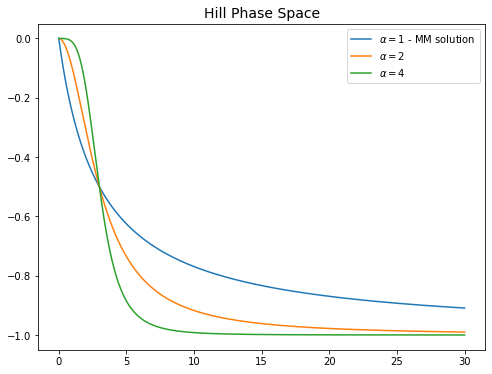

In [6]:
def hill (S : np.ndarray, vmax : float, km : float, alpha : float) -> np.ndarray:
    '''
    Hill kinetic
    
    Parameters
    ----------
        S : array-like
            Concentration of S
        
        vmax : float
            Maximum velocity of the kinetic equation
            
        km : float
            
        alpha : float
            Exponential term of the Hill equation
    '''
    return - (vmax * S**alpha) / (km**alpha + S**alpha)

# generate a range of possible S values
S = np.linspace(start=0, stop=30, num=1000)

# classical MM solution
dS_MM = hill(S, vmax=1, km=3, alpha=1)

dS_a2 = hill(S, vmax=1, km=3, alpha=2)
dS_a4 = hill(S, vmax=1, km=3, alpha=4)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(S, dS_MM, label=r'$\alpha=1$ - MM solution')
ax.plot(S, dS_a2, label=r'$\alpha=2$')
ax.plot(S, dS_a4, label=r'$\alpha=4$')
ax.set_title('Hill Phase Space', fontsize=14)
ax.legend()

We can easily notice how incrementing the $\alpha$ exponent the system requires more time to achieve the critical threshold.